In [1]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import seaborn as sns
import tensorflow as tf
import torch 
from tensorflow.keras.metrics import Precision


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dirname = '/kaggle/input/jpeg-melanoma-256x256'
data_dir_train = '/kaggle/input/jpeg-melanoma-256x256/train'

df_train = pd.read_csv(os.path.join('/kaggle/input/jpeg-melanoma-256x256', "train.csv"))
df_test = pd.read_csv(os.path.join('/kaggle/input/jpeg-melanoma-256x256', "test.csv"))

In [4]:
#df_train.head
#df_train = df_train[:1000]
df_train.head

<bound method NDFrame.head of          image_name  patient_id     sex  age_approx  \
0      ISIC_2637011  IP_7279968    male        45.0   
1      ISIC_0015719  IP_3075186  female        45.0   
2      ISIC_0052212  IP_2842074  female        50.0   
3      ISIC_0068279  IP_6890425  female        45.0   
4      ISIC_0074268  IP_8723313  female        55.0   
...             ...         ...     ...         ...   
33121  ISIC_9999134  IP_6526534    male        50.0   
33122  ISIC_9999320  IP_3650745    male        65.0   
33123  ISIC_9999515  IP_2026598    male        20.0   
33124  ISIC_9999666  IP_7702038    male        50.0   
33125  ISIC_9999806  IP_0046310    male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  \
0                         head/neck   unknown           benign       0   
1                   upper extremity   unknown           benign       0   
2                   lower extremity     nevus           benign       0   
3            

In [5]:
df_test.describe()

,age_approx,width,height
count,10982.000000,10982.000000,10982.000000
mean,49.525587,3650.207248,2394.198962
std,14.370589,2101.342467,1448.851291
min,10.000000,640.000000,480.000000
25%,40.000000,1872.000000,1053.000000
50%,50.000000,3264.000000,2448.000000
75%,60.000000,6000.000000,4000.000000
max,90.000000,6000.000000,5185.000000


In [6]:
df_train.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target', 'tfrecord', 'width', 'height'],
      dtype='object')

In [7]:
df_test.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'width', 'height'],
      dtype='object')

In [8]:
df_train.head

<bound method NDFrame.head of          image_name  patient_id     sex  age_approx  \
0      ISIC_2637011  IP_7279968    male        45.0   
1      ISIC_0015719  IP_3075186  female        45.0   
2      ISIC_0052212  IP_2842074  female        50.0   
3      ISIC_0068279  IP_6890425  female        45.0   
4      ISIC_0074268  IP_8723313  female        55.0   
...             ...         ...     ...         ...   
33121  ISIC_9999134  IP_6526534    male        50.0   
33122  ISIC_9999320  IP_3650745    male        65.0   
33123  ISIC_9999515  IP_2026598    male        20.0   
33124  ISIC_9999666  IP_7702038    male        50.0   
33125  ISIC_9999806  IP_0046310    male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  \
0                         head/neck   unknown           benign       0   
1                   upper extremity   unknown           benign       0   
2                   lower extremity     nevus           benign       0   
3            

In [9]:
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

print("Train data missing:\n",missing_train)
print("\nTest data missing:\n",missing_test)

Train data missing:
 image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
dtype: int64

Test data missing:
 image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
width                              0
height                             0
dtype: int64


In [10]:
df_train["patient_id"].is_unique
#df_train.size

False

In [11]:
df_test["patient_id"].is_unique

False

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Number of benign: 32542
Number of malignant: 584


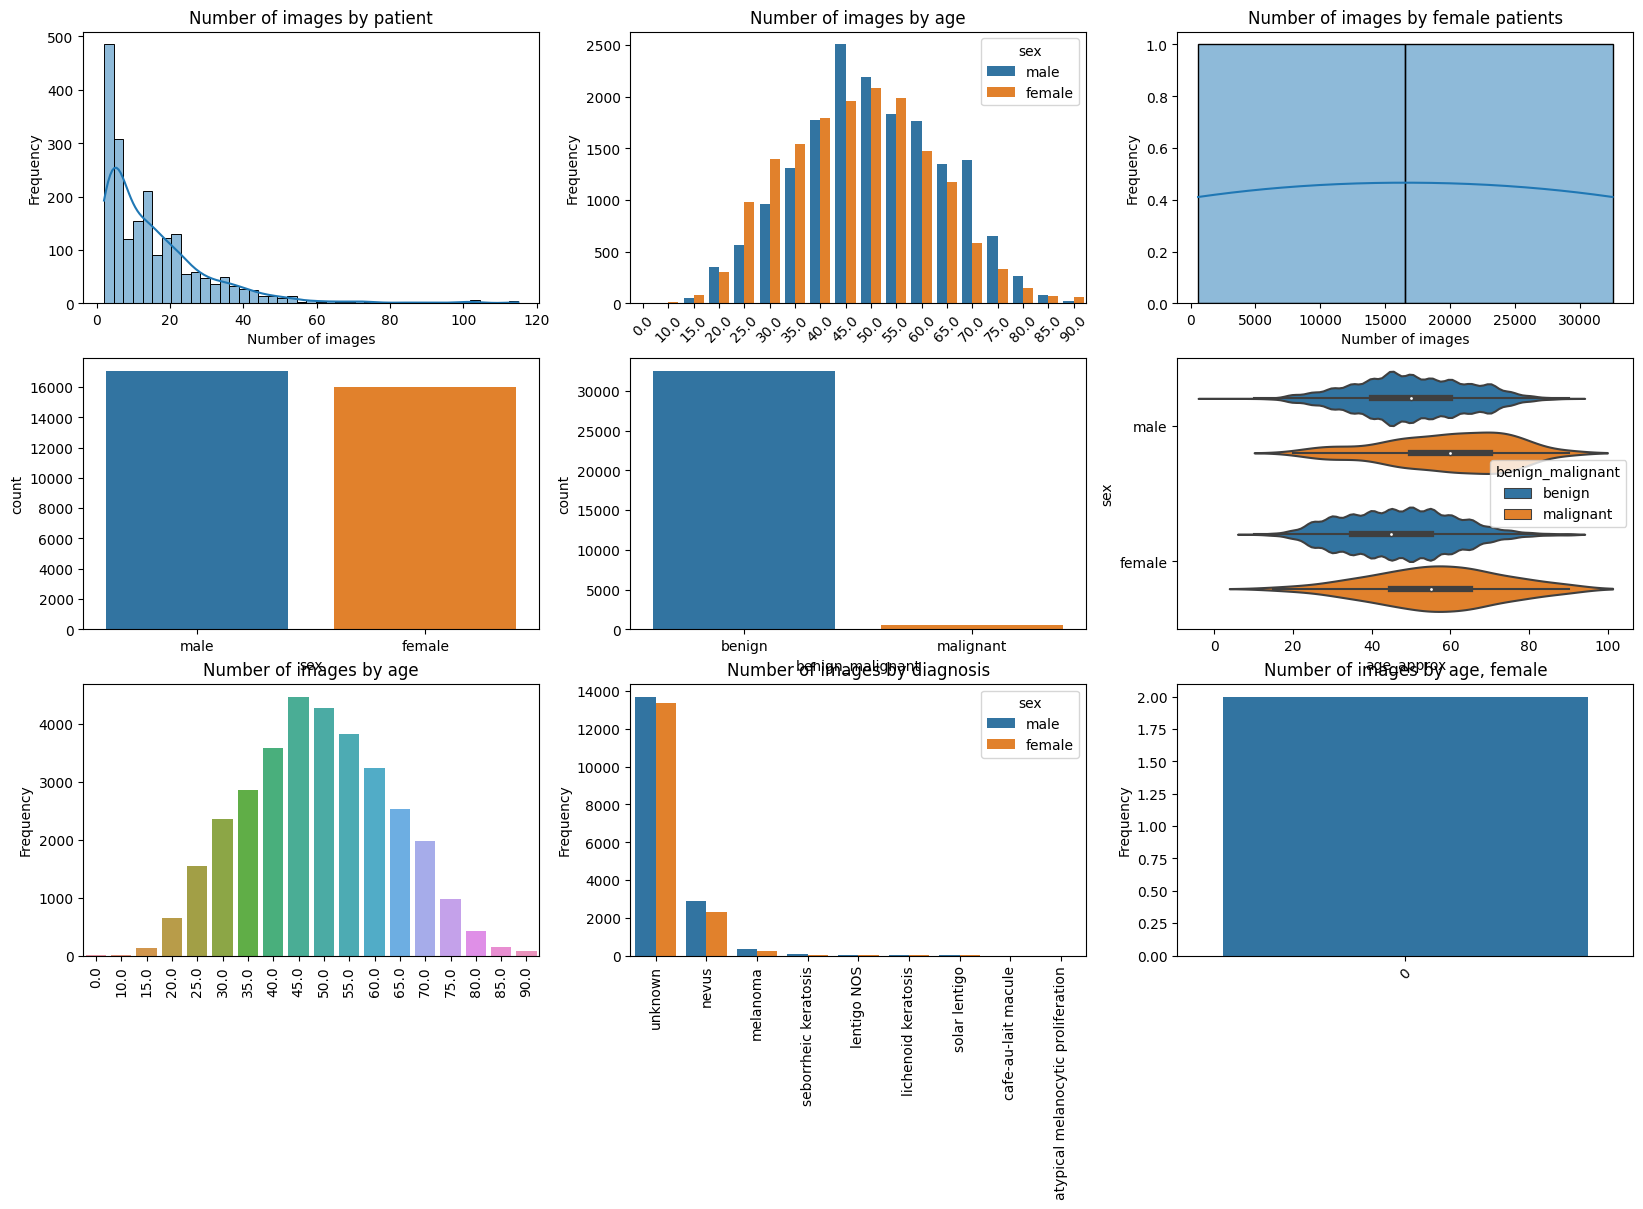

In [12]:
"""Train data"""

patients_train = df_train["patient_id"].value_counts()
sex_train = df_train['sex']
malignant_benign = df_train['target'].value_counts()
men_women = df_train['sex']
age_train = df_train['age_approx'].value_counts().to_frame()
#print(women_train)#['patient_id'])#.value_counts())
#print(men_train['patient_id'].value_counts())

#what i need:
#patient id, number of occurences, age? -> can scatterplot by age and num of occurences

#print(age_train)
fig, ax = plt.subplots(3,3,figsize=(20,12))

#graph -> number of images per patient
sns.histplot(patients_train, ax=ax[0,0], kde=True);
ax[0,0].set_xlabel("Number of images")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Number of images by patient");

#frequency of images by patients, men
'''
sns.histplot(data=df_train,,ax=ax[0,1], kde=True)
ax[0,1].set_xlabel("Number of images")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Number of images by sex (?)");'''

#number of patients, by gender
sns.histplot(data=malignant_benign,ax=ax[0,2], kde=True)
ax[0,2].set_xlabel("Number of images")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Number of images by female patients");

#graph -> women vs men entries (bar plot?)
sns.countplot(data=df_train,x='sex',ax=ax[1,0])

#graph -> number of malignant and benign, by gender and age
sns.countplot(x='benign_malignant',data=df_train,ax=ax[1,1])

#graph -> age in gender (same as above)
sns.violinplot(data=df_train,x='age_approx',y='sex', hue='benign_malignant', ax=ax[1,2])


sns.countplot(data=df_train, x='age_approx', ax=ax[2,0])
#ax[2,0].set_xlabel("Number of images")
ax[2,0].set_ylabel("Frequency")
ax[2,0].set_title("Number of images by age");

labels = ax[2,0].get_xticklabels();
ax[2,0].set_xticklabels(labels, rotation=90);
ax[2,0].set_xlabel("");



sns.countplot(data=df_train, x='age_approx', hue='sex', ax=ax[0,1])
#ax[2,0].set_xlabel("Number of images")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Number of images by age");

labels = ax[0,1].get_xticklabels();
ax[0,1].set_xticklabels(labels, rotation=45);
ax[0,1].set_xlabel("");

sns.countplot(data=df_train, x='diagnosis', hue='sex', ax=ax[2,1])
#ax[2,0].set_xlabel("Number of images")
ax[2,1].set_ylabel("Frequency")
ax[2,1].set_title("Number of images by diagnosis");
labels1 = ax[2,1].get_xticklabels();
ax[2,1].set_xticklabels(labels1, rotation=90);
ax[2,1].set_xlabel("");

sns.countplot(data=malignant_benign, ax=ax[2,2])
#ax[2,0].set_xlabel("Number of images")
ax[2,2].set_ylabel("Frequency")
ax[2,2].set_title("Number of images by age, female");

labels = ax[2,2].get_xticklabels();
ax[2,2].set_xticklabels(labels, rotation=45);
ax[2,2].set_xlabel("");
print("Number of benign:", df_train[df_train['target'] == 0].shape[0])
print("Number of malignant:", df_train[df_train['target'] == 1].shape[0])

In [13]:
batch_size = 32
img_width, img_height = 224, 224

In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import TargetEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
pd.options.mode.chained_assignment = None

mean_value = df_train['age_approx'].mean()
mean_value = round(mean_value/5)
df_train['age_approx'].fillna(mean_value, inplace=True)
#for gender, we can use the mode as its categorical data
mode_value = df_train['sex'].mode().iloc[0]
df_train['sex'].fillna(mode_value, inplace=True)
#as for the anatomical site, it would be best to
mode_value1 = df_train['anatom_site_general_challenge'].mode().iloc[0]
df_train['anatom_site_general_challenge'].fillna(mode_value1, inplace=True)


# Assuming metadata is your DataFrame with all the information
X_train, X_test = train_test_split(df_train, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)


# Normalize age for training data
scaler = StandardScaler()
X_train['age_approx'] = scaler.fit_transform(X_train[['age_approx']])

# One-hot encode sex for training data
#one_hot_encoder = OneHotEncoder()
X_train = pd.concat([X_train, pd.get_dummies(X_train['sex'], prefix='sex')], axis=1)
#X_train['sex'] = one_hot_encoder.fit_transform(df_train['sex'])

cat_cols = ['anatom_site_general_challenge', 'diagnosis', 'benign_malignant']

#target encode
target_encoder = TargetEncoder()
X_train[cat_cols] = target_encoder.fit_transform(X_train[cat_cols],X_train['target'])

#y_train = X_train['target']
#X_train_without_target = X_train.drop('target')
 
#oversampler = RandomOverSampler(random_state=42)  # Adjust random_state as needed
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_without_target, y_train)



# Normalize age for validation and test data using training data statistics
X_val['age_approx'] = scaler.transform(X_val[['age_approx']])
X_test['age_approx'] = scaler.transform(X_test[['age_approx']])

# One-hot encode sex for validation and test data using training data statistics
X_val = pd.concat([X_val, pd.get_dummies(X_val['sex'], prefix='sex')], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['sex'], prefix='sex')], axis=1)

#convert from boolan to 0 and 1
X_val[['sex_female', 'sex_male']] = X_val[['sex_female', 'sex_male']].astype(int)
X_test[['sex_female', 'sex_male']] = X_test[['sex_female', 'sex_male']].astype(int)
X_train[['sex_female', 'sex_male']] = X_train[['sex_female', 'sex_male']].astype(int)

X_val[cat_cols] = target_encoder.transform(X_val[cat_cols])
X_test[cat_cols] = target_encoder.transform(X_test[cat_cols])




print(X_train.head)
#X_test.head()
#X_val.head()


<bound method NDFrame.head of          image_name  patient_id     sex  age_approx  \
23708  ISIC_7196094  IP_1672532    male    0.429091   
18033  ISIC_5495649  IP_9392784  female    0.084053   
3906   ISIC_1274550  IP_2322991    male    1.119165   
27110  ISIC_8209611  IP_1153670    male   -0.260984   
18357  ISIC_5586153  IP_3278850    male    0.774128   
...             ...         ...     ...         ...   
5366   ISIC_1700051  IP_4842370  female   -0.260984   
11459  ISIC_3530422  IP_3678398    male    0.774128   
3418   ISIC_1135213  IP_3370847    male   -1.641134   
25953  ISIC_7875959  IP_5561220  female   -2.331209   
32497  ISIC_9815163  IP_0656529    male    0.774128   

       anatom_site_general_challenge  diagnosis  benign_malignant  target  \
23708                       0.016174        0.0               0.0       0   
18033                       0.018894        0.0               0.0       0   
3906                        0.018974        0.0               0.0       0   
2

In [15]:
print(X_train['anatom_site_general_challenge'].value_counts())


anatom_site_general_challenge
0.016100    2540
0.016675    2525
0.016174    2524
0.015422    2489
0.015777    2462
0.016160    1253
0.013982    1226
0.016005    1207
0.015089    1180
0.014386    1152
0.020169     733
0.018974     713
0.019655     710
0.020650     702
0.018894     701
0.042043     289
0.042004     288
0.040543     274
0.037169     256
0.037001     251
0.009455      65
0.013839      60
0.013651      57
0.013528      55
0.004233      40
0.013377      23
0.050740      21
0.050126      20
0.048362      17
0.036560      17
Name: count, dtype: int64


In [16]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from PIL import ImageEnhance, ImageOps

def load_and_preprocess_image(img_path, img_width, img_height, enhance_contrast = True):
    # Implement image loading and preprocessing based on your needs
    # For example, using a library like PIL or OpenCV
    # Return the preprocessed image as a NumPy array
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))
    # Enhance contrast
    if enhance_contrast:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(3.0)  # Adjust the enhancement factor as needed

    img_array = np.array(img) / 255.0  # Normalize pixel values to be in the range [0, 1]
    return img_array

In [17]:
def load_and_preprocess_image_train(img_path, img_width, img_height, enhance_contrast = True, augment = True):
    # Implement image loading and preprocessing based on your needs
    # For example, using a library like PIL or OpenCV
    # Return the preprocessed image as a NumPy array
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))
    # Enhance contrast
    if enhance_contrast:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(3.0)  # Adjust the enhancement factor as needed
    if augment:
        # Randomly apply augmentation techniques
        if random.random() > 0.5:
            img = img.rotate(random.uniform(-10, 10))  # Random rotation
        if random.random() > 0.5:
            img = ImageOps.flip(img)  # Horizontal flip

    img_array = np.array(img) / 255.0  # Normalize pixel values to be in the range [0, 1]
    return img_array

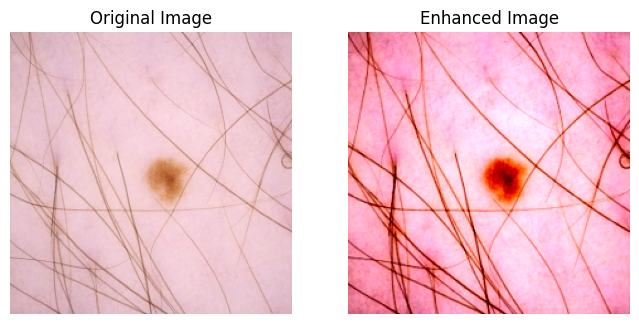

In [18]:
import random
img_path = os.path.join(data_dir_train, df_train['image_name'][random.randint(0,len(df_train))]+'.jpg')
og_img = Image.open(img_path)

img = load_and_preprocess_image(img_path, img_width, img_height)

# Plot the original and enhanced images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(og_img, cmap='gray')  # Use 'gray' colormap for black and white images
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for black and white images
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

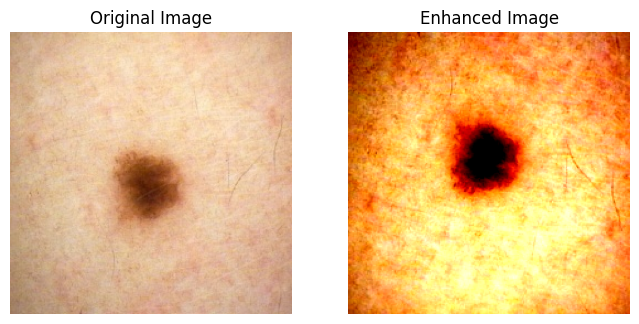

In [19]:
img_path = os.path.join(data_dir_train, df_train['image_name'][random.randint(1, len(df_train))]+'.jpg')
og_img = Image.open(img_path)
img = load_and_preprocess_image_train(img_path, img_width, img_height)

# Plot the original and enhanced images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(og_img, cmap='gray')  # Use 'gray' colormap for black and white images
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for black and white images
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

In [20]:

datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to be in the range [0, 1]
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True     # Random horizontal flip
)

In [21]:
def custom_data_generator(metadata, img_width, img_height, batch_size, steps_per_epoch, training = False):
    num_samples = metadata.shape[0]
    if training:
        indices = np.arange(num_samples)

    while True:
        if training:
            np.random.shuffle(indices)
        
        for offset in range(0, num_samples, batch_size):
            if training:
                batch_indices = indices[offset:offset+batch_size]
                batch_metadata = metadata.iloc[batch_indices]
            else:
                batch_metadata = metadata.iloc[offset:offset+batch_size]


            batch_images = []
            batch_age = []
            batch_sex = []
            batch_labels = []
            batch_anatomical = []

            for _, row in batch_metadata.iterrows():
                img_path = os.path.join(data_dir_train, row['image_name']+'.jpg')
                if training:
                    img = load_and_preprocess_image_train(img_path, img_width, img_height)
                else:
                    img = load_and_preprocess_image(img_path, img_width, img_height)
                age = row['age_approx']
                sex = row['sex_male']#.values  # Assuming two columns because of one-hot encoding
                #print('sex',type(sex))
                label = row['target']
                anatomical = row['anatom_site_general_challenge']
                

                batch_images.append(img)
                batch_age.append(age)
                batch_sex.append(sex)
                batch_labels.append(label)
                batch_anatomical.append(anatomical)


            yield ([np.array(batch_images), np.array(batch_age), np.array(batch_sex), np.array(batch_anatomical)],
                   np.array(batch_labels))


In [22]:
from tensorflow.keras.metrics import Recall

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Define the age input
age_input = layers.Input(shape=(1,), name='age_approx')
sex_input = layers.Input(shape=(1,), name='sex')  # Assuming 2 columns for one-hot encoding
anatomical_input = layers.Input(shape=(1,), name='anatom_site_general_challenge')

for layer in base_model.layers:
    layer.trainable = False

# Add the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)

# Add more dense layers to reduce the dimensionality of the base model output
x = layers.Dense(128, activation='relu')(x)  # Adjust the number of units as needed
x = layers.Dropout(0.2)(x)

# Concatenate the output of the base model with the age and sex inputs
x = layers.concatenate([x, age_input, sex_input, anatomical_input])

# Add more layers for classification
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)  # 1 output for binary classification

# Create the model with two inputs (image and age), sex_input
model = models.Model(inputs=[base_model.input, age_input, sex_input, anatomical_input], outputs=output_layer)

#metrics
precision_metric = Precision()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy",precision_metric, Recall()])


94765736/94765736 [==============================] - 0s 0us/step


In [23]:
print(model)

In [24]:
#steps_per_epoch_num = 5
#batch_size = 10
print(batch_size)
print(X_train.shape[0])
steps_per_epoch_train = (X_train.shape[0]//batch_size)+1
steps_per_epoch_val = (X_val.shape[0]//batch_size)+1
steps_per_epoch_test = (X_test.shape[0]//batch_size)+1

print(steps_per_epoch_train,steps_per_epoch_val,steps_per_epoch_test)
train_generator = custom_data_generator(X_train, img_width, img_height, batch_size, steps_per_epoch_train, training = True)
val_generator = custom_data_generator(X_val, img_width, img_height, batch_size, steps_per_epoch_val)
test_generator = custom_data_generator(X_test, img_width, img_height, batch_size, steps_per_epoch_test)


32
23850
746 83 208


In [25]:
# Get the first batch from the generator
batch = next(test_generator)

# Unpack the batch into inputs and labels
inputs, labels = batch

# Print or inspect the values
print("Inputs:")
print("Images shape:", inputs[0].shape)
print("Age shape:", inputs[1].shape)
#print("Sex shape:", inputs[2].shape)
print("Labels shape:", labels.shape)

# Print the first few values (adjust as needed)
print("First few image values:", inputs[0][:2])
print("First few age values:", inputs[1][:2])
#print("First few sex values:", inputs[1][:1])
print("First few label values:", labels[:2])

print("malignant", X_train['benign_malignant'])

Inputs:
Images shape: (32, 224, 224, 3)
Age shape: (32,)
Labels shape: (32,)
First few image values: [[[[1.         0.42745098 0.50980392]
   [1.         0.36862745 0.45098039]
   [1.         0.32156863 0.41568627]
   ...
   [1.         0.38039216 0.43921569]
   [1.         0.29803922 0.40392157]
   [1.         0.30980392 0.42745098]]

  [[1.         0.38039216 0.4745098 ]
   [1.         0.35686275 0.43921569]
   [1.         0.36862745 0.45098039]
   ...
   [1.         0.36862745 0.43921569]
   [1.         0.35686275 0.4627451 ]
   [1.         0.40392157 0.52156863]]

  [[1.         0.36862745 0.4627451 ]
   [1.         0.35686275 0.43921569]
   [1.         0.39215686 0.45098039]
   ...
   [1.         0.43921569 0.49803922]
   [1.         0.4627451  0.56862745]
   [1.         0.4627451  0.59215686]]

  ...

  [[1.         0.2627451  0.32156863]
   [1.         0.33333333 0.35686275]
   [1.         0.35686275 0.35686275]
   ...
   [1.         0.41568627 0.32156863]
   [1.         0.39215

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import History

num_per_class = np.bincount(X_train['target']) #binary problem, melanoma or not
print(num_per_class)
total_samples = X_train.shape[0] #total number of samples

weight_0 = total_samples / (2 * num_per_class[0])
weight_1 = total_samples / (2 * num_per_class[1])

history_callback = History()
class_weight = {0: weight_0, 1: weight_1}  # Adjust the weight for the minority class as needed

epochs = 60

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(train_generator, epochs=epochs, 
          validation_data=val_generator, verbose=1, steps_per_epoch=steps_per_epoch_test, validation_steps=steps_per_epoch_val,callbacks=[history_callback, early_stopping], class_weight=class_weight)

[23427   423]
Epoch 1/60
208/208 [==============================] - 103s 445ms/step - loss: 0.7766 - accuracy: 0.5167 - precision: 0.0201 - recall: 0.5372 - val_loss: 0.9711 - val_accuracy: 0.1113 - val_precision: 0.0159 - val_recall: 0.9048
Epoch 2/60
208/208 [==============================] - 78s 377ms/step - loss: 0.7115 - accuracy: 0.5359 - precision: 0.0250 - recall: 0.6240 - val_loss: 0.8263 - val_accuracy: 0.4068 - val_precision: 0.0219 - val_recall: 0.8333
Epoch 3/60
208/208 [==============================] - 77s 370ms/step - loss: 0.6702 - accuracy: 0.6088 - precision: 0.0295 - recall: 0.6783 - val_loss: 0.7991 - val_accuracy: 0.4234 - val_precision: 0.0219 - val_recall: 0.8095
Epoch 4/60
208/208 [==============================] - 60s 291ms/step - loss: 0.6637 - accuracy: 0.5668 - precision: 0.0258 - recall: 0.6356 - val_loss: 0.7153 - val_accuracy: 0.5060 - val_precision: 0.0233 - val_recall: 0.7381
Epoch 5/60
208/208 [==============================] - 46s 223ms/step - loss: 

In [27]:
print(X_test.shape[0])
print(len(X_test)//batch_size)
predictions = model.predict(test_generator, batch_size = batch_size, verbose = 1, steps=steps_per_epoch_test)

threshold_value = 0.5
predicted_labels = (predictions > threshold_value).astype(int)
print(predicted_labels)


metric_results = model.evaluate(test_generator, steps=steps_per_epoch_test, batch_size = batch_size)

6626
207
208/208 [==============================] - 64s 305ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
208/208 [==============================] - 35s 168ms/step - loss: 0.5132 - accuracy: 0.8151 - precision: 0.0445 - recall: 0.4538


In [28]:

newList = np.where(predictions >= 0.5,1, 0)

print(newList)
print(np.sum(X_test['target'] == 1))
print(np.sum(X_test['target'] == 0))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
119
6507


In [29]:
#order will be: loss,"accuracy", precision_metric, Recall()

total_loss = metric_results[0]
total_accuracy = metric_results[1]
total_precision = metric_results[2]
total_recall = metric_results[3]

print(total_loss, total_accuracy, total_precision, total_recall)


try:
    f1_values = 2 * (total_precision * total_recall) / (total_precision + total_recall)
    print('F1 value:', f1_values)
except:
    pass
    

0.5132361650466919 0.8151222467422485 0.044481053948402405 0.45378151535987854
F1 value: 0.08102025441538656


In [30]:
# Access the loss values from the training history
print(history_callback.history.keys())

training_loss_values = history_callback.history['loss']
validation_loss_values = history_callback.history['val_loss']

training_accuracy_values = history_callback.history['accuracy']
validation_accuracy_values = history_callback.history['val_accuracy']

training_precision_values = history_callback.history['precision']
validation_precision_values = history_callback.history['val_precision']

training_recall_values = history_callback.history['recall']
validation_recall_values = history_callback.history['val_recall']


print("Training Loss Values:", training_loss_values)
print("Validation Loss Values:", validation_loss_values)

print("Training Accuracy Values:", training_accuracy_values)
print("Validation Accuracy Values:", validation_accuracy_values)

print("Training Precision Values:", training_precision_values)
print("Validation Precision Values:", validation_precision_values)

print("Training Recall Values:", training_recall_values)
print("Validation Recall Values:", validation_recall_values)

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])
Training Loss Values: [0.77658611536026, 0.7114530205726624, 0.6702137589454651, 0.6637252569198608, 0.6421186923980713, 0.6485487222671509, 0.647051215171814, 0.6264327764511108, 0.6399834156036377, 0.688791811466217, 0.6131097674369812, 0.670113205909729, 0.6358387470245361, 0.6135520339012146, 0.6634619235992432, 0.6519775986671448, 0.6186856031417847, 0.6344088912010193, 0.6154800057411194, 0.6117739081382751, 0.6855698227882385, 0.6817204356193542, 0.7288047075271606, 0.5988364815711975, 0.6204985976219177]
Validation Loss Values: [0.9711098670959473, 0.8262825012207031, 0.7991066575050354, 0.7152504324913025, 0.5077516436576843, 0.5949709415435791, 0.6139746904373169, 0.652433454990387, 0.7610896229743958, 0.6535639762878418, 0.6435840129852295, 0.6494901776313782, 0.641498327255249, 0.6303245425224304, 0.6529669165611267, 0.6852142214775085, 0.6638853549957275, 0.672

range(1, 26)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

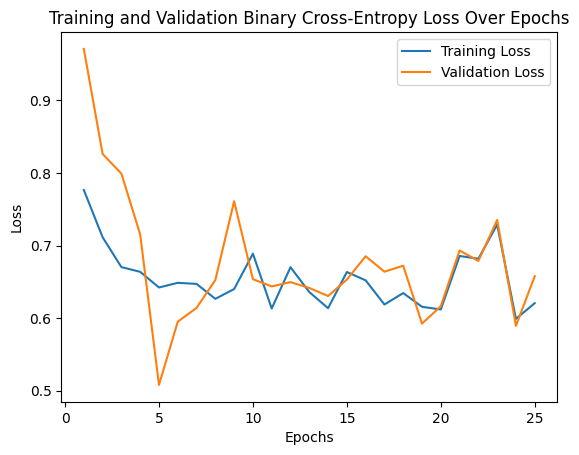

In [31]:
all_epochs = range(1, len(training_loss_values) + 1)
print(all_epochs)

# Create a Seaborn line plot for training and validation precision
sns.lineplot(x=all_epochs, y=training_loss_values, label='Training Loss')
sns.lineplot(x=all_epochs, y=validation_loss_values, label='Validation Loss')

#sns.lineplot(x=epochs, y=training_loss_values, label='Training Loss')
#sns.lineplot(x=epochs, y=validation_loss_values, label='Validation Loss')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Binary Cross-Entropy Loss Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

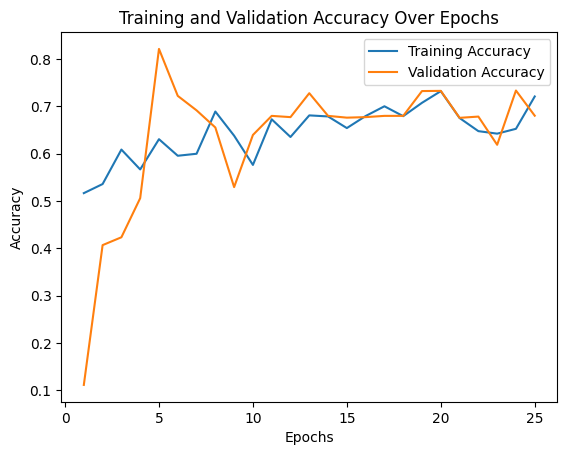

In [32]:
# Create a Seaborn line plot for training and validation precision
sns.lineplot(x=all_epochs, y=training_accuracy_values, label='Training Accuracy')
sns.lineplot(x=all_epochs, y=validation_accuracy_values, label='Validation Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

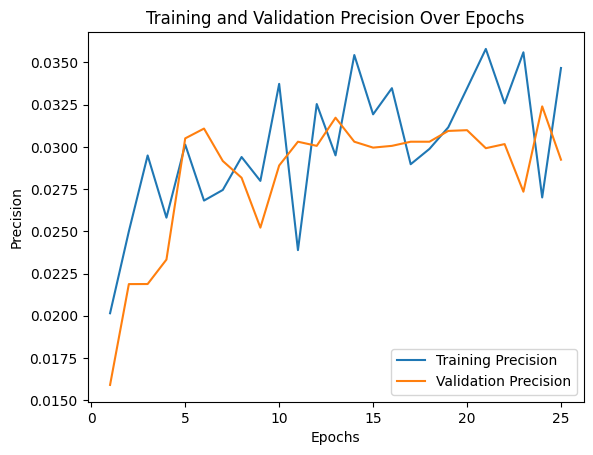

In [33]:
# Create a Seaborn line plot for training and validation precision
sns.lineplot(x=all_epochs, y=training_precision_values, label='Training Precision')
sns.lineplot(x=all_epochs, y=validation_precision_values, label='Validation Precision')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

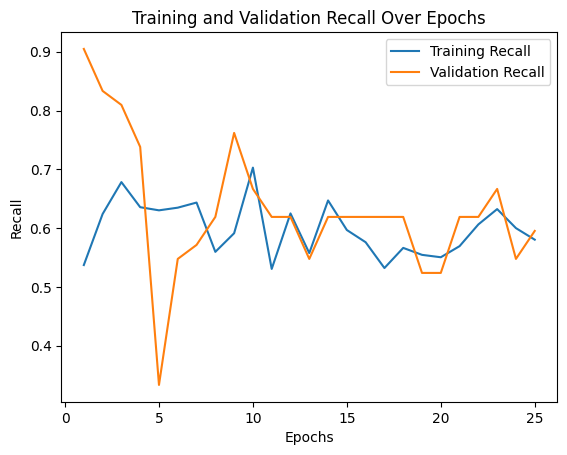

In [34]:
# Create a Seaborn line plot for training and validation precision
sns.lineplot(x=all_epochs, y=training_recall_values, label='Training Recall')
sns.lineplot(x=all_epochs, y=validation_recall_values, label='Validation Recall')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [35]:
from sklearn.metrics import precision_recall_curve

print(X_test.shape[0])
# Assuming y_true is the true labels and y_pred_probs is the predicted probabilities
auc_precision, auc_recall, auc_thresholds = precision_recall_curve(X_test['target'], predictions)


6626


In [36]:
from sklearn.metrics import auc

pr_auc = auc(auc_recall, auc_precision)
print("PR AUC:", pr_auc)

PR AUC: 0.021855862825112846


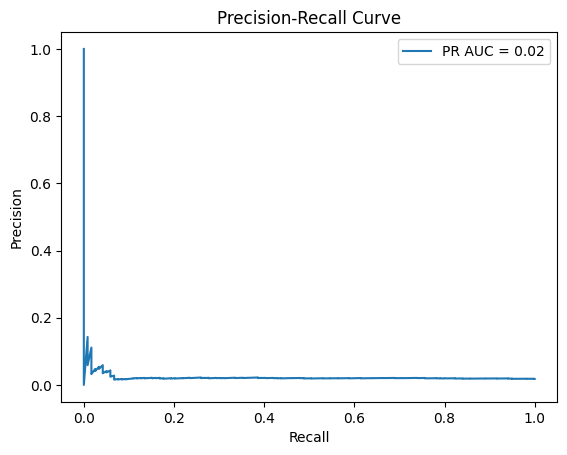

In [37]:
# Plot the precision-recall curve
plt.plot(auc_recall, auc_precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()